In [166]:
import pandas as pd

In [167]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [168]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})

In [169]:
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [170]:
data.head()

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [171]:
data.isnull().sum()

Season                   0
Age                      0
Childish_diseases        0
Accident_trauma          0
Surgical_intervention    0
High_fevers_time         0
ol_cons                  0
Smoking                  0
Sitting                  0
Output                   0
dtype: int64

In [172]:
X = data.drop("Output",axis="columns")
y = data.Output

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [175]:
X_scaled[:9]

array([[-0.31675276,  0.1739701 , -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  2.55148066],
       [-0.31675276,  2.24504273,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.52194279],
       [-0.31675276, -1.4000451 ,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.67102753, -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028,  1.00803226, -0.8077807 , -0.14450482],
       [-0.31675276,  0.00828429,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.00828429,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  0.50253169],
       [-0.31675276,  0.00828429, -2.5869495 , -0.88640526, -1.02020406,
        -2.05939072, -0.19200614, -0.8077807 ,  0.17901344],
       [-0.31675276,  2.74210016,  0.38655567,  1.12815215,  0

# **Splitting the Dataset**

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [178]:
X_train.shape

(75, 9)

In [179]:
X_test.shape

(25, 9)

# **Model building using Decision Classifier**

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
scores

array([0.5, 0.2, 0.9, 0.7, 0.8, 1. , 0.7, 0.9, 0.8, 0.5])

In [183]:
scores.mean()

0.7

# **Implementing Bagging Algorithm**

In [184]:
from sklearn.ensemble import BaggingClassifier

In [185]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=50, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [186]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=50, oob_score=True, random_state=0)

In [187]:
bag_model.oob_score_

0.8666666666666667

In [188]:
bag_model.score(X_test, y_test)

0.88

MODEL 2

In [189]:
import pandas as pd

In [190]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [191]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [192]:
X = data.drop("Output",axis="columns")
y = data.Output

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [195]:
X_scaled[:9]

array([[-0.31675276,  0.1739701 , -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  2.55148066],
       [-0.31675276,  2.24504273,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.52194279],
       [-0.31675276, -1.4000451 ,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.67102753, -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028,  1.00803226, -0.8077807 , -0.14450482],
       [-0.31675276,  0.00828429,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.00828429,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  0.50253169],
       [-0.31675276,  0.00828429, -2.5869495 , -0.88640526, -1.02020406,
        -2.05939072, -0.19200614, -0.8077807 ,  0.17901344],
       [-0.31675276,  2.74210016,  0.38655567,  1.12815215,  0

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

In [198]:
X_train.shape

(75, 9)

In [199]:
X_test.shape

(25, 9)

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)

In [203]:
scores

array([0.55, 0.8 , 0.95, 0.75, 0.65])

In [204]:
scores.mean()

0.74

In [205]:
from sklearn.ensemble import BaggingClassifier

In [206]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=50, 
max_samples=0.7, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [207]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=50, oob_score=True, random_state=0)

In [208]:
bag_model.oob_score_

0.8666666666666667

In [209]:
bag_model.score(X_test, y_test)

0.84

MODEL 3

In [210]:
import pandas as pd

In [211]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [212]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [213]:
X = data.drop("Output",axis="columns")
y = data.Output

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [216]:
X_scaled[:9]

array([[-0.31675276,  0.1739701 , -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  2.55148066],
       [-0.31675276,  2.24504273,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.52194279],
       [-0.31675276, -1.4000451 ,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.67102753, -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028,  1.00803226, -0.8077807 , -0.14450482],
       [-0.31675276,  0.00828429,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.00828429,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  0.50253169],
       [-0.31675276,  0.00828429, -2.5869495 , -0.88640526, -1.02020406,
        -2.05939072, -0.19200614, -0.8077807 ,  0.17901344],
       [-0.31675276,  2.74210016,  0.38655567,  1.12815215,  0

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

In [219]:
X_train.shape

(75, 9)

In [220]:
X_test.shape

(25, 9)

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
from sklearn.model_selection import cross_val_score

In [223]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)

In [224]:
scores

array([0.5, 0.2, 0.9, 0.7, 0.9, 1. , 0.7, 1. , 0.8, 0.5])

In [225]:
scores.mean()

0.72

In [226]:
from sklearn.ensemble import BaggingClassifier

In [227]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=50, 
max_samples=0.6, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [228]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.6,
                  n_estimators=50, oob_score=True, random_state=0)

In [229]:
bag_model.oob_score_

0.8533333333333334

In [230]:
bag_model.score(X_test, y_test)

0.88

MODEL 4

In [231]:
import pandas as pd

In [232]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [233]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [234]:
X = data.drop("Output",axis="columns")
y = data.Output

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [237]:
X_scaled[:9]

array([[-0.31675276,  0.1739701 , -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  2.55148066],
       [-0.31675276,  2.24504273,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.52194279],
       [-0.31675276, -1.4000451 ,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.67102753, -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028,  1.00803226, -0.8077807 , -0.14450482],
       [-0.31675276,  0.00828429,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.00828429,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  0.50253169],
       [-0.31675276,  0.00828429, -2.5869495 , -0.88640526, -1.02020406,
        -2.05939072, -0.19200614, -0.8077807 ,  0.17901344],
       [-0.31675276,  2.74210016,  0.38655567,  1.12815215,  0

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

In [240]:
X_train.shape

(75, 9)

In [241]:
X_test.shape

(25, 9)

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
from sklearn.model_selection import cross_val_score

In [244]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)

In [245]:
scores

array([0.5, 0.2, 0.8, 0.7, 0.8, 1. , 0.7, 0.8, 0.8, 0.6])

In [246]:
scores.mean()

0.69

In [247]:
from sklearn.ensemble import BaggingClassifier

In [248]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=50, 
max_samples=0.65, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [249]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.65,
                  n_estimators=50, oob_score=True, random_state=0)

In [250]:
bag_model.oob_score_

0.8533333333333334

In [251]:
bag_model.score(X_test, y_test)

0.88

MODEL 5

In [252]:
import pandas as pd

In [253]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [254]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [255]:
X = data.drop("Output",axis="columns")
y = data.Output

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [258]:
X_scaled[:9]

array([[-0.31675276,  0.1739701 , -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  2.55148066],
       [-0.31675276,  2.24504273,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.52194279],
       [-0.31675276, -1.4000451 ,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.67102753, -2.5869495 ,  1.12815215,  0.98019606,
        -0.32881028,  1.00803226, -0.8077807 , -0.14450482],
       [-0.31675276,  0.00828429,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614, -0.8077807 ,  0.50253169],
       [-0.31675276,  0.00828429,  0.38655567, -0.88640526,  0.98019606,
        -0.32881028, -0.19200614,  0.43495884,  0.50253169],
       [-0.31675276,  0.00828429, -2.5869495 , -0.88640526, -1.02020406,
        -2.05939072, -0.19200614, -0.8077807 ,  0.17901344],
       [-0.31675276,  2.74210016,  0.38655567,  1.12815215,  0

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

In [261]:
X_train.shape

(75, 9)

In [262]:
X_test.shape

(25, 9)

In [263]:
from sklearn.tree import DecisionTreeClassifier

In [264]:
from sklearn.model_selection import cross_val_score

In [265]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)

In [266]:
scores

array([0.5, 0.2, 0.9, 0.7, 0.9, 1. , 0.7, 1. , 0.8, 0.5])

In [267]:
scores.mean()

0.72

In [268]:
from sklearn.ensemble import BaggingClassifier

In [269]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=50, 
max_samples=0.75, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [270]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.75,
                  n_estimators=50, oob_score=True, random_state=0)

In [271]:
bag_model.oob_score_

0.8533333333333334

In [272]:
bag_model.score(X_test, y_test)

0.84

# **Implementing Boosting Algorithm**

# **AdaaBoost**

In [273]:
data.columns

Index(['Season', 'Age', 'Childish_diseases', 'Accident_trauma',
       'Surgical_intervention', 'High_fevers_time', 'ol_cons', 'Smoking',
       'Sitting', 'Output'],
      dtype='object')

In [274]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
for label in data.columns:
  data[label] = LabelEncoder().fit(data[label]).transform(data[label])

X = data.drop(['Output'],axis=1)
Y = data['Output']

In [275]:
AdaBoost = AdaBoostClassifier(n_estimators=50,learning_rate=1,algorithm='SAMME')

AdaBoost.fit(X,Y)

prediction = AdaBoost.score(X,Y)

print('The accuracy is:',prediction*100,'%')  

The accuracy is: 90.0 %


# **XG Boosting**

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [277]:
from xgboost import XGBClassifier

In [278]:
xgboost = XGBClassifier(n_estimators = 50, learning_rate = 0.05).fit(X_train, Y_train, early_stopping_rounds = 5, eval_set = [(X_test, Y_test)],verbose = False)
score_xgb = xgboost.score(X_test,Y_test)

In [279]:
print('The accuracy is: ',score_xgb*100, '%')

The accuracy is:  90.0 %


# **Gradient Bosting**

In [280]:
from sklearn.ensemble import GradientBoostingClassifier

In [281]:
GradBoost = GradientBoostingClassifier(n_estimators=20, learning_rate=1,max_features=2, max_depth=2, random_state=0)

GradBoost.fit(X,Y)

prediction = GradBoost.score(X,Y)

print('The accuracy is: ',prediction*100, '%')

The accuracy is:  97.0 %


# **Building Random Forest**

In [282]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)

In [284]:
scores.mean()

0.85

MODEL 2

In [285]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=10)

In [287]:
scores.mean()

0.8900000000000002

MODEL 3

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=9)

In [290]:
scores.mean()

0.8905723905723906

# **KNN Classifier**

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [292]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [293]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})

In [294]:
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [295]:
data.columns

Index(['Season', 'Age', 'Childish_diseases', 'Accident_trauma',
       'Surgical_intervention', 'High_fevers_time', 'ol_cons', 'Smoking',
       'Sitting', 'Output'],
      dtype='object')

In [296]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [300]:
y_pred = classifier.predict(X_test)

In [301]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[17  4]
 [ 0 19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.83      1.00      0.90        19

    accuracy                           0.90        40
   macro avg       0.91      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40

Accuracy: 0.9


# **SVM Algorithm**

In [302]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [303]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [304]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})

In [305]:
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [306]:
data.columns

Index(['Season', 'Age', 'Childish_diseases', 'Accident_trauma',
       'Surgical_intervention', 'High_fevers_time', 'ol_cons', 'Smoking',
       'Sitting', 'Output'],
      dtype='object')

In [307]:
x= data.iloc[:, [2,3]].values  
y= data.iloc[:, 4].values  

In [308]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

from sklearn.preprocessing import StandardScaler    

st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [309]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [310]:
y_pred= classifier.predict(x_test)  

In [311]:
classifier.score(x_test,y_test)

0.56

In [312]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

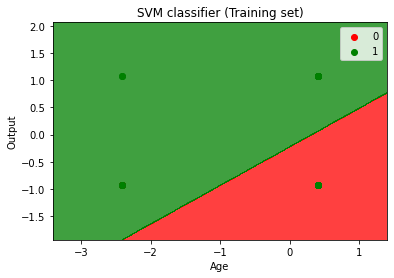

In [313]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Output')  
mtp.legend()  
mtp.show()  

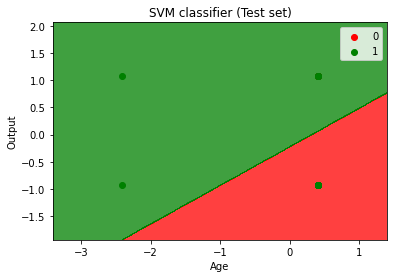

In [314]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Output')  
mtp.legend()  
mtp.show()  

# **Naiive Bayes Algorithm**

In [315]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [316]:
data = pd.read_csv('/content/fertility.csv')
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [317]:
data["Output"] = data["Output"].replace({'N': 0, 'O': 1})

In [318]:
data

,Season,Age,Childish_diseases,Accident_trauma,Surgical_intervention,High_fevers_time,ol_cons,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [319]:
data.columns

Index(['Season', 'Age', 'Childish_diseases', 'Accident_trauma',
       'Surgical_intervention', 'High_fevers_time', 'ol_cons', 'Smoking',
       'Sitting', 'Output'],
      dtype='object')

In [320]:
x = data.iloc[:, [2, 3]].values  
y = data.iloc[:, 4].values 

In [321]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [322]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [323]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [324]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [325]:
y_pred = classifier.predict(x_test)  

In [326]:
classifier.score(x_test,y_test)

0.48

In [327]:
from sklearn.metrics import confusion_matrix  

In [328]:
cm = confusion_matrix(y_test, y_pred)  

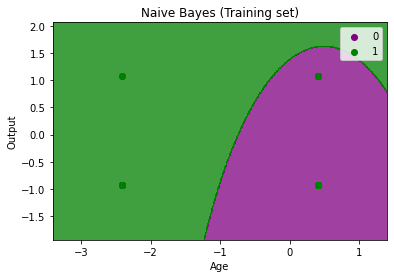

In [329]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Output')  
mtp.legend()  
mtp.show()  

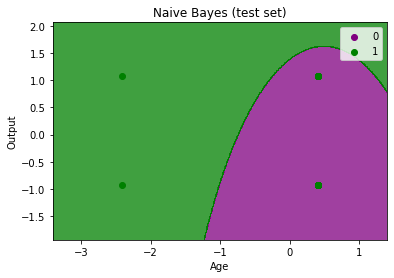

In [330]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Output')  
mtp.legend()  
mtp.show()  